# **Gruid Translator**
To the extent possible under law, the person who associated CC0 with **Gruid Translator** has waived
all copyright and related or neighboring rights to **Gruid Translator**.

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sys.path.insert(0, "../src")
import constants as c
import file_io as io
import gemcevent_handler as gemc_eh
import gruidevent_handler as gruid_eh

In [39]:
# INFILE = "/home/twig/data/code/babycal/bcal_generator_bruno/bcal_20210311122138_r11c11.txt"
INFILE = "/home/twig/data/code/babycal/bcal_generator_bruno/output_test_1.txt"

dt = 0.01
dx = 0.1
dy = 0.1
fevent = 1
nevents = 0
nrows = 7
ncols = 7

t = 0.27


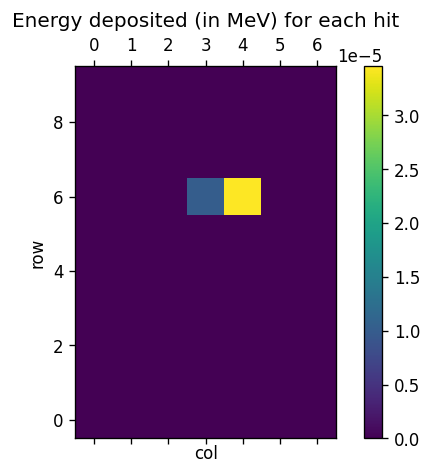

t = 0.28


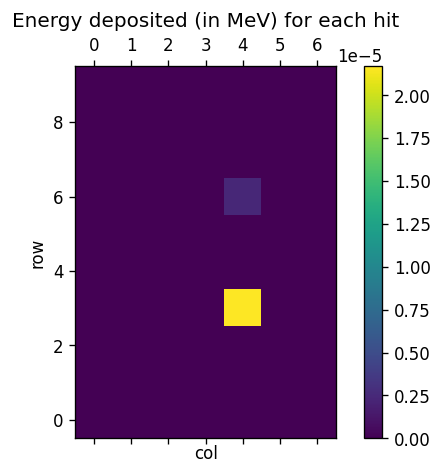

t = 0.29


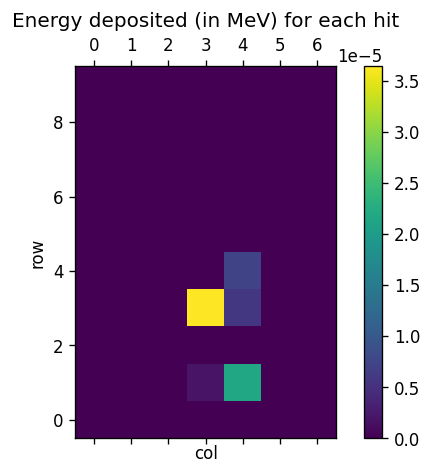

t = 0.3


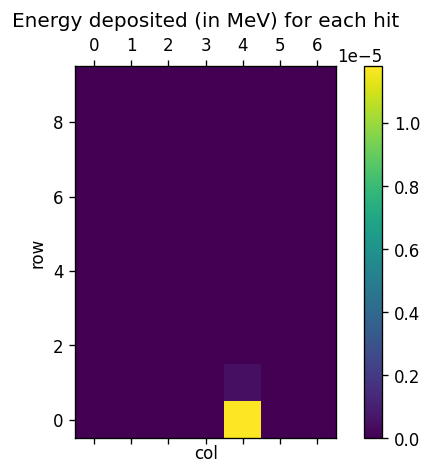

t = 0.31


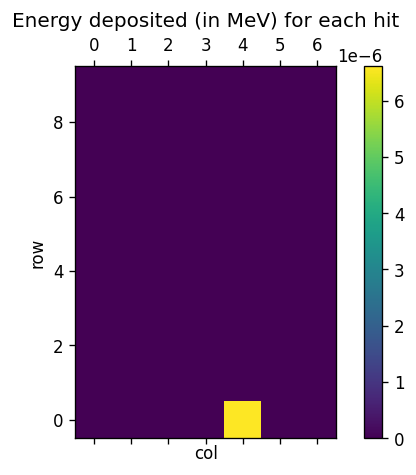

In [41]:
# Load gemc file
(path, filename) = io.split_address(INFILE)
if nrows is None and ncols is None: (nrows, ncols) = io.decode_filename(filename)
(metadata, events) = io.load_file(INFILE, fevent, nevents)

# Store and process hits
ei = fevent
gemchitsdict  = {}
gruidhitsdict = {}
for event in events:
    key = filename + ' ' + c.S_EVENT + ' ' + str(ei)
    gemchitsdict[key]  = gemc_eh.extract_hits(event)
    gruidhitsdict[key] = gruid_eh.generate_event(gemchitsdict[key], nrows, ncols, dt, dx, dy)
    ei += 1

# Select last event
en = -1
for k in gruidhitsdict.keys():
    ei = int(k.split(' ')[-1])
    if ei > en: en = ei
k = filename + ' ' + c.S_EVENT + ' ' + str(ei)

# Store the time series
gruid_nrows = gruidhitsdict[k][c.S_GRUIDMETA][c.S_NROWS]
gruid_ncols = gruidhitsdict[k][c.S_GRUIDMETA][c.S_NCOLS]
m     = {c.S_GRUIDH1: {}, c.S_GRUIDH2: {}}
sum_m = {}

for side in m.keys():
    for t in gruidhitsdict[k][side].keys():
        m[side][t] = np.zeros([gruid_nrows, gruid_ncols]) # Check if this is in order, seems weird.
        sum_m[t]   = np.zeros([gruid_nrows, gruid_ncols])
        for loc in gruidhitsdict[k][side][t]:
            (x,y) = map(int, loc.split(','))
            m[side][t][x,y] = gruidhitsdict[k][side][t][loc]
            sum_m[t][x,y]  += gruidhitsdict[k][side][t][loc]

# Draw plots
for t in m[c.S_GRUIDH1].keys():
    print("t = " + str(round(t, 3)))
    plt.figure(num=1, figsize=(6, 4), dpi=120, facecolor='w', edgecolor='k')
    plt.matshow(sum_m[t], fignum=1, origin="lower")
    plt.colorbar()
    plt.title("Energy deposited (in MeV) for each hit")
    plt.xlabel("col")
    plt.ylabel("row")
    plt.show()